<a href="https://colab.research.google.com/github/danielperezh/Machine_learning/blob/main/P1_4_1_sklearn_arboles_de_desici%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Arboles de clasificación (dataset flor IRIS)

##Importando librerias necesarias

In [ ]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris                  #dataset sobre la flor iris (uso libre)
from sklearn.model_selection import train_test_split    #clase para dividir dataset (train y test)
from sklearn.tree import DecisionTreeClassifier         #clase que permite implementar un arbol de desición
import matplotlib.pyplot as plt                         #libreria para generar graficos

##Cargando el dataset

In [ ]:
db_iris = load_iris()

##Explorando los datos

In [ ]:
#imprimiento la descripcion del dataset
#print(db_iris.DESCR)
#imprimiento datos del target
print(db_iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


##Convirtiendo el dataset en un dataframe 
(tabla tipo excel para facilitar el trabajo)

In [ ]:
df_iris = pd.DataFrame(db_iris.data, columns=db_iris.feature_names)
df_iris['target'] = db_iris.target
df_iris.head(70)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
65,6.7,3.1,4.4,1.4,1
66,5.6,3.0,4.5,1.5,1
67,5.8,2.7,4.1,1.0,1
68,6.2,2.2,4.5,1.5,1


##Dividiendo el conjunto de datos (train y test)


In [ ]:
#dividiremos el dataset en  75% (train) y 25% (test), estos valores estan por defecto
X_train, X_test, Y_train, Y_test = train_test_split(df_iris[db_iris.feature_names], df_iris['target'], test_size=0.40, random_state=48)

##Instanciar un arbol de desición

In [ ]:
# vamos a usar un árbol de profundidad 2 (maximo dos niveles), 
#sino se define esta valor el arbol puede crecer hasta que el algoritmo encuentre una minima ramificación
#cual es la profundidad ideal?
arbol_clasi = DecisionTreeClassifier(max_depth = 10, random_state = 0)

##Entrenando el algoritmo

In [ ]:
arbol_clasi.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

##Usar datos de test (25%) para predecir 

In [ ]:
# Predición para un registro
#tomamos la información del primer registro (X_test)
print(X_test.iloc[0])
# el verdadero resultado de la flor
print(Y_test.iloc[0])
#le pasamos esos datos al algoritmo
arbol_clasi.predict(X_test.iloc[0].values.reshape(1, -1))

#Predicciones para varios (10) registros
arbol_clasi.predict(X_test[0:10])

sepal length (cm)    5.7
sepal width (cm)     2.9
petal length (cm)    4.2
petal width (cm)     1.3
Name: 96, dtype: float64
1


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([1, 1, 2, 0, 1, 2, 0, 1, 0, 1])

##calcular la precisión (accuary) del algoritmo


In [ ]:
accuary = arbol_clasi.score(X_test, Y_test)
print(accuary)

0.9166666666666666


##graficando el arbol

In [ ]:
#para graficar  Iris-Setosa (0), - Iris-Versicolour (1), - Iris-Virginica (2)
class_names_list=list(['setosa','versicolor','virginica'])
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
dot_data = export_graphviz(arbol_clasi,feature_names=db_iris.feature_names, class_names=class_names_list)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree_iris10.png')

True

*   condición: si es un nodo donde se toma alguna decisión
*   gini: es una medida de impureza (entropía ).
*   samples: número de muestras que satisfacen las condiciones necesarias para llegar a este nodo
*   value: cuántas muestras de cada clase llegan a este nodo
*   class: qué clase se le asigna a las muestras que llegan a este nodo

##conociendo las caracteristicas más importantes
para crear el árbol el algoritmo encuentra que unas características son más importantes que otras...cuales son?

In [ ]:
#creamos un dataframe de panda (mejora la visualización/administración de los datos)
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(arbol_clasi.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances.head(10)


,feature,importance
3,petal width (cm),0.56
2,petal length (cm),0.44
0,sepal length (cm),0.00
1,sepal width (cm),0.00


##Mejorando el árbol
que tanta profundidad es la óptima para el árbol?

In [ ]:
#la profundad de un árbol la medimos con max_depth
# creamos una lista con profundidades de 1 a 6 
max_depth_lista = list(range(1, 6))
# creamos un listado de resultados de exactitud 
accuracy = []
for depth in max_depth_lista:
    
    arbol_clasi = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    arbol_clasi.fit(X_train, Y_train)
    score = arbol_clasi.score(X_test, Y_test)
    accuracy.append(score)

creamos un grafico para ver los resultados

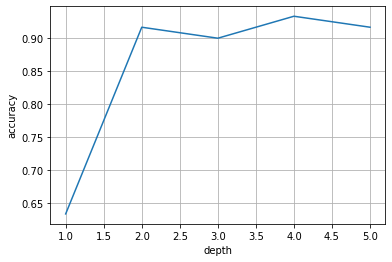

In [ ]:
plt.plot(max_depth_lista,accuracy)
plt.ylabel('accuracy')
plt.xlabel('depth')
plt.grid(True)
plt.show()

###Hiper-parametros que ayudan a mejorar la creación de un árbol
*   max_depth: la profundidad máxima del árbol. En los ejemplos anteriores hemos usado max_depth = 2
*   min_samples_split: número mínimo de muestras necesarias antes de dividir este nodo. También se puede expresar en porcentaje.
*   min_samples_leaf: número mínimo de muestras que debe haber en un nodo final (hoja). También se puede expresar en porcentaje.
*   max_leaf_nodes: número máximo de nodos finales

#Arbol de clasificación - dataset TITANIC.scv
https://github.com/luisFernandoCastellanosG/Machine_learning/blob/master/Databaset_para_trabajar_sklearn/dataset_titanic.csv

##Importando librerias

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split    #clase para dividir dataset (train y test)
from sklearn.tree import DecisionTreeClassifier         #clase que permite implementar un arbol de desición
from sklearn.metrics import accuracy_score              #clase para generar la exactitud del modelo (accuracy)
import matplotlib.pyplot as plt                         #libreria para generar graficos
import seaborn as sns

##cargando datos (leyendo csv)
#El cvs fue tomado de: https://www.kaggle.com/c/titanic/data


---


*   sibsp: Número de hermanos / cónyuges a bordo
*   Parch: Número de padres / niños a bordo
*   Fare: tarifa



In [ ]:
#podemos cargar el CSV directamente desde GITHUB con el raw
df = pd.read_csv("https://raw.githubusercontent.com/luisFernandoCastellanosG/Machine_learning/master/1-Machine_Learning_Classic/Databasets/dataset_titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##Conociendo los datos

In [ ]:
#nombres de las columnas
#df.columns
#descripción de información del df
df.describe()
# información del tipo de datos que tiene el df
#df.info()
#valores nulos
#df.isnull().sum()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


###Graficando los datos

In [ ]:
#mostrando datos, con porcentajes
datos=df.Survived.value_counts(normalize = True)
print(datos)
plt.pie(datos, labels=["No","Si"], autopct="%0.1f %%")
plt.title("sobrevivieron - cuenta total")
plt.show()

In [ ]:
plt.title("sobrevivientes - Male VS female")
datos=df.Sex[df.Survived == 1].value_counts(normalize = True)
print(datos)
plt.pie(datos, labels=["female","men"], autopct="%0.1f %%")
plt.show()

In [ ]:
#sobrevivientes por clase o ticket (barras)
fig = plt.figure(figsize=(10,5))
#colors bgrcmykw
df.Pclass[df.Survived == 1].value_counts(normalize = True).plot(kind="barh", alpha=0.5)
plt.title("Sobrevivientes por clase de ticket")
plt.show()

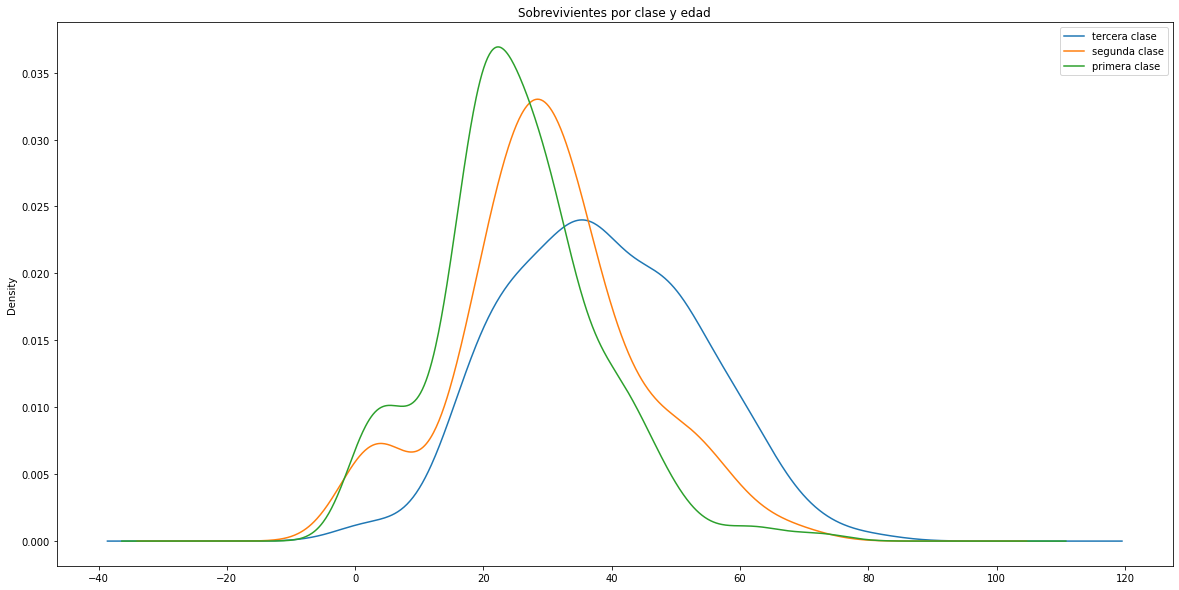

In [ ]:
#clases vs edad
fig = plt.figure(figsize=(20,10))
plt.title("Sobrevivientes por clase y edad")
for t_class in [1,2,3]:
    df.Age[df.Pclass == t_class].plot(kind="kde")
    
plt.legend({"primera clase", "segunda clase", "tercera clase"})
plt.show()

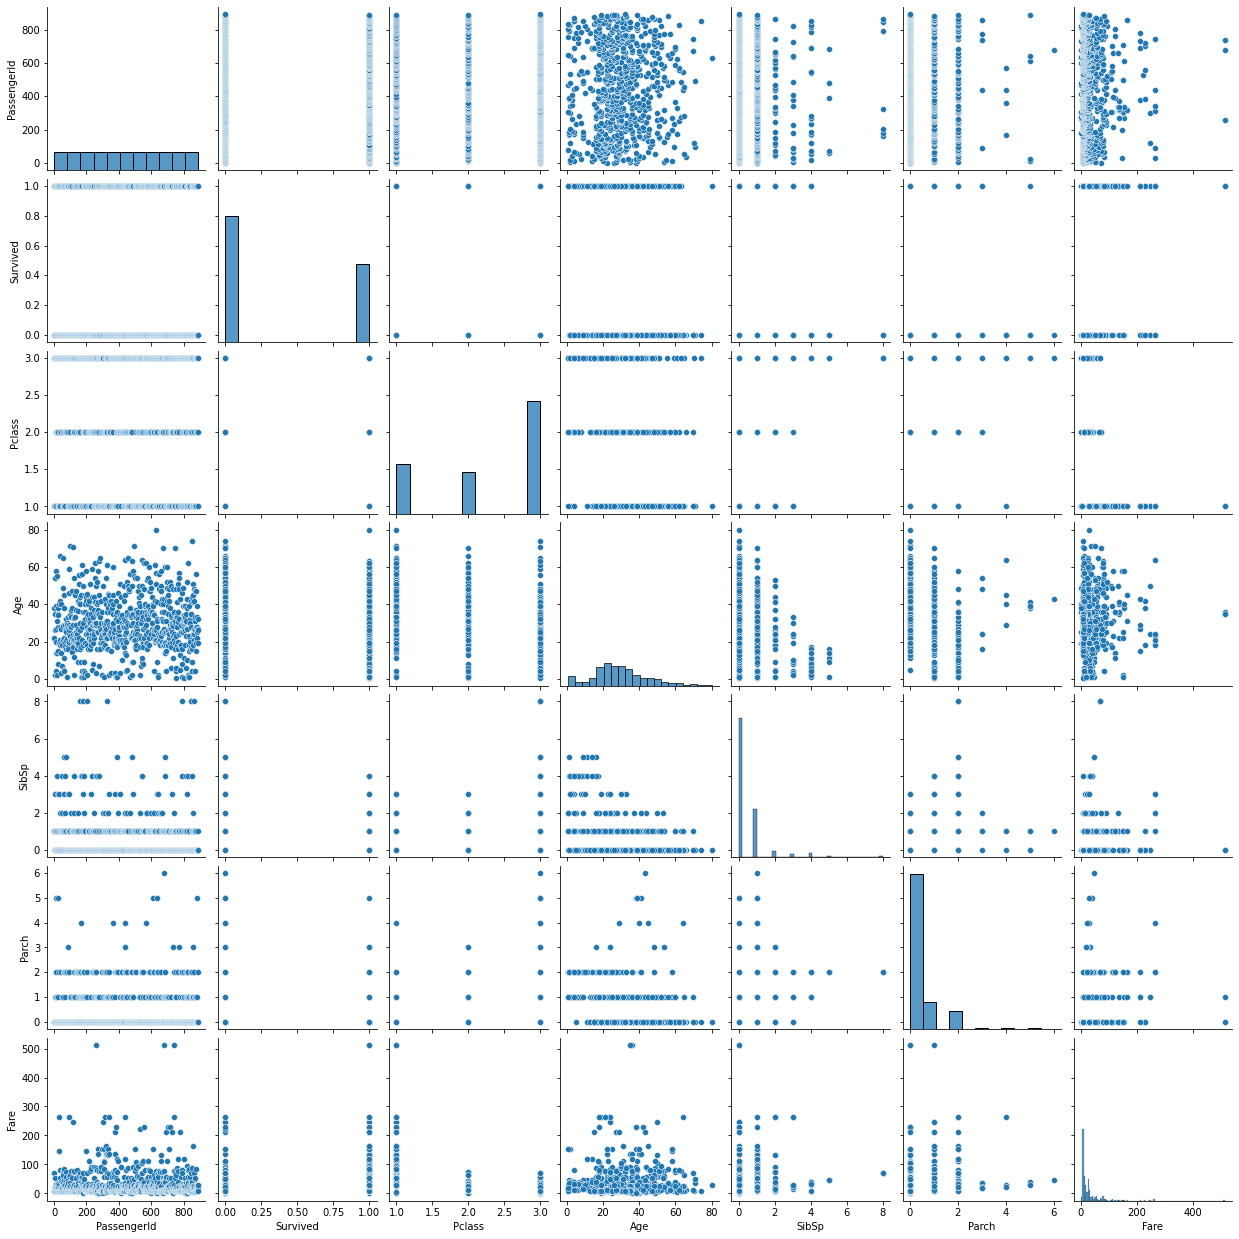

In [ ]:
sns.pairplot(df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


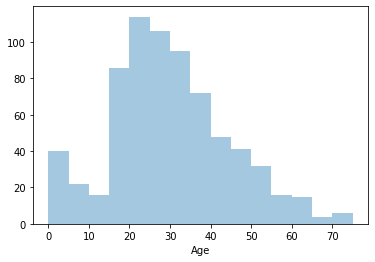

In [ ]:
#crear un histograma impuestos de gasolina
sns.distplot(df.Age,bins = np.arange(0,80,5), kde = False)
plt.show()

In [ ]:
data=df[df["Survived"] == 1]
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


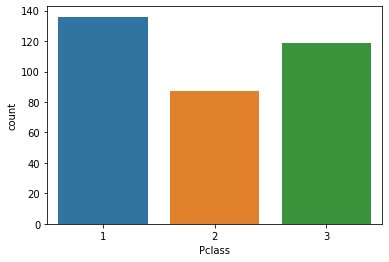

In [ ]:
#distribución por clases
sns.countplot(x="Pclass", data=df[df["Survived"] == 1])
plt.show()

##Eliminamos las columnas que no son relevantes para el estudio


*   Cabin
*   PassengerId
*   Name
*   Ticket
*   Embarked (puerto de embarque)



In [ ]:
df.drop(['Cabin','PassengerId','Name','Ticket','Embarked '], axis=1,inplace=True)
df.dropna(inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


##reemplazando palabras por letras

In [ ]:
#creamos un diccionario con los valores originales y los valores de reemplazo
a = {"male" : 1, "female" : 2}
df["Sex"] = df["Sex"].apply(lambda x:a[x])
df["Sex"].head()

0    1
1    2
2    2
3    2
4    1
Name: Sex, dtype: int64

##convertimos datos de texto a númericos

In [ ]:
from sklearn import preprocessing
#cambiamos las palabras (male, female) por (1, 0)
le = preprocessing.LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

##reemplazando nulos con ceros

In [ ]:
df["Age"] = df["Age"].fillna(0)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,2,38.0,1,0,71.2833
2,1,3,2,26.0,0,0,7.9250
3,1,1,2,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


##instanciar un árbol de decisión

In [ ]:
arbol = DecisionTreeClassifier()

##Separamos los datos (sexo+clase vs sobrevivio)

In [ ]:
X = df[['Pclass','Sex']]
y = df['Survived']
#cambiamos la proporción de 70%-train y 30%-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##entrenamos el modelo

In [ ]:
arbol.fit(X_train, y_train)

DecisionTreeClassifier()

##realizamos predicción

In [ ]:
# Predecimos sobre nuestro set de entrenamieto
y_train_pred = arbol.predict(X_train)
# Predecimos sobre nuestro set de test
y_test_pred = arbol.predict(X_test)
# Comaparamos con las etiquetas reales
print('Accuracy sobre conjunto de Train:', accuracy_score(y_train_pred,y_train))
print('Accuracy sobre conjunto de Test:', accuracy_score(y_test_pred,y_test))
accuary_global = arbol.score(X_test, y_test)
print('Global Accuracy'+str(accuary))
#Cuando el error de entrenamiento es mayor al del test es porque hay overfitting 

Accuracy sobre conjunto de Train: 0.7955911823647295
Accuracy sobre conjunto de Test: 0.7813953488372093
Global Accuracy0.9166666666666666


##Graficando el árbol

In [ ]:
#para graficar  male (0), - female (1)
class_names_list=list(['male', 'female'])
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
dot_data = export_graphviz(arbol,feature_names=['Pclass','Sex'], class_names=class_names_list)
graph = graph_from_dot_data(dot_data)
graph.write_png('arbol_titanic.png')

True

#Árbol de regresión (consumo de gasolina en EEUU)

##Importando librerias

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split     #clase para separar datos entre train y test
from sklearn.tree import DecisionTreeRegressor           #clase de arbol de desición para hacer regresión
from sklearn import metrics                              #libreria para obtener metricas de valoración del modelo

import matplotlib.pyplot as plt                         #libreria para generar graficos
import seaborn as sns                                   #versión mejorar de plt
%matplotlib inline

##Cargando el dataset 

In [ ]:
df_gas = pd.read_csv('https://raw.githubusercontent.com/luisFernandoCastellanosG/Machine_learning/master/Databasets/petrol_consumption.csv')
df_gas.head()

,gasolina_impuesto,ingreso_promedio,carreteras_pavimentadas,porcen_licencias_conducion_poblacion,gasolina_Consumo
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


##Conociendo los datos:

In [ ]:
#nombres de las columnas
df_gas.columns
#descripción de información del df
df_gas.describe()
# información del tipo de datos que tiene el df
#df_gas.info()
#valores nulos
df_gas.isnull().sum()

gasolina_impuesto                       0
ingreso_promedio                        0
carreteras_pavimentadas                 0
porcen_licencias_conducion_poblacion    0
gasolina_Consumo                        0
dtype: int64

###Gaficando datos

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


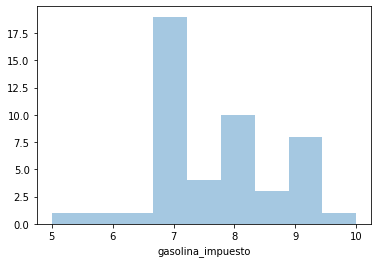

In [ ]:
sns.distplot(df_gas.gasolina_impuesto, kde = False)
plt.show()

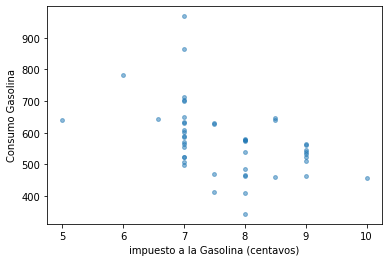

In [ ]:
#impuesto vs consumo
X = df_gas.gasolina_impuesto
y = df_gas.gasolina_Consumo
plt.scatter(X,y, s=15, alpha=0.5)
plt.xlabel('impuesto a la Gasolina (centavos)')
plt.ylabel('Consumo Gasolina')
plt.show()

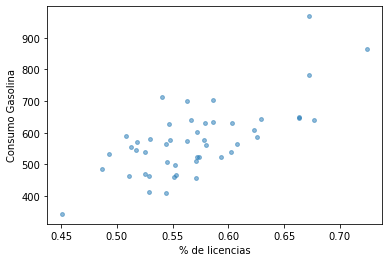

In [ ]:
#licencias vs consumo
X = df_gas['porcen_licencias_conducion_poblacion']
y = df_gas.gasolina_Consumo
plt.scatter(X,y, s=15, alpha=0.5)
plt.xlabel('% de licencias')
plt.ylabel('Consumo Gasolina')
plt.show()

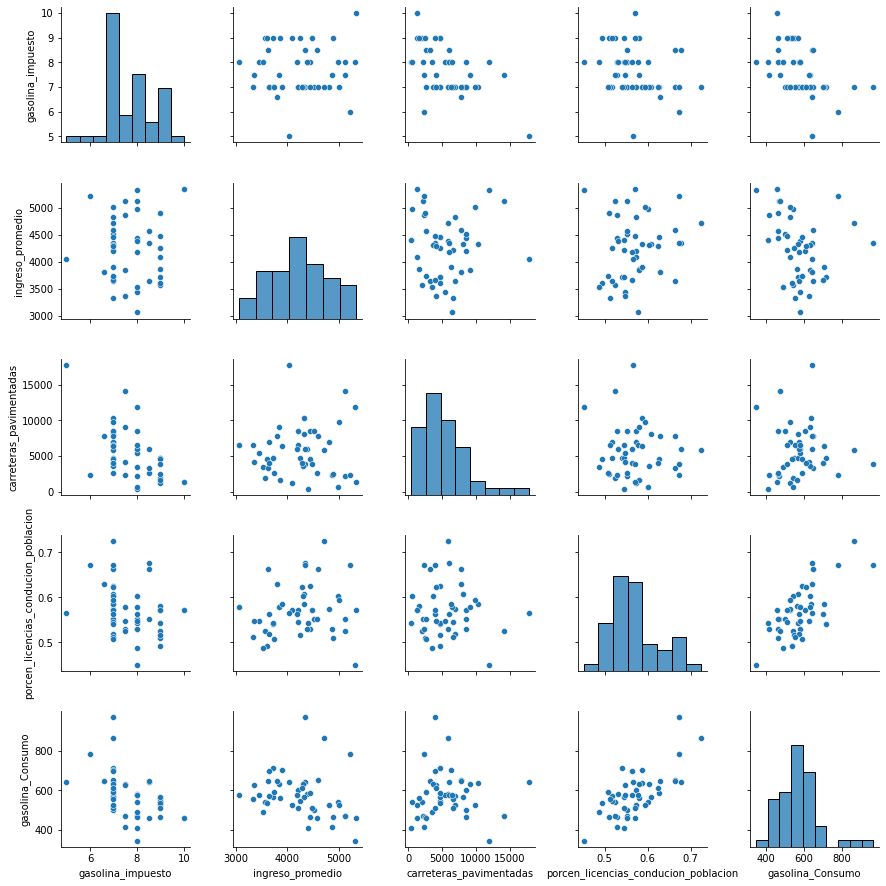

In [ ]:
#grafica global (varible vs todas las variables)
sns.pairplot(df_gas)

## Separamos los datos en X y Y

In [ ]:
#creamos una instancia solo para Y donde esta el consumo
y = df_gas['gasolina_Consumo']
#creamos una instancia de X donde no esta el consumo
X = df_gas.gasolina_impuesto.to_numpy()
#X = df_gas.drop('gasolina_Consumo', axis=1)
X=X.reshape (-1, 1)
print(X)

[[ 9.  ]
 [ 9.  ]
 [ 9.  ]
 [ 7.5 ]
 [ 8.  ]
 [10.  ]
 [ 8.  ]
 [ 8.  ]
 [ 8.  ]
 [ 7.  ]
 [ 8.  ]
 [ 7.5 ]
 [ 7.  ]
 [ 7.  ]
 [ 7.  ]
 [ 7.  ]
 [ 7.  ]
 [ 7.  ]
 [ 7.  ]
 [ 8.5 ]
 [ 7.  ]
 [ 8.  ]
 [ 9.  ]
 [ 9.  ]
 [ 8.5 ]
 [ 9.  ]
 [ 8.  ]
 [ 7.5 ]
 [ 8.  ]
 [ 9.  ]
 [ 7.  ]
 [ 7.  ]
 [ 8.  ]
 [ 7.5 ]
 [ 8.  ]
 [ 6.58]
 [ 5.  ]
 [ 7.  ]
 [ 8.5 ]
 [ 7.  ]
 [ 7.  ]
 [ 7.  ]
 [ 7.  ]
 [ 7.  ]
 [ 6.  ]
 [ 9.  ]
 [ 7.  ]
 [ 7.  ]]


## Separamos los datos para TRAIN y TEST

In [ ]:
#random_state= number (0-42), garantiza  que la división será siempre la misma (solo se usa para documentar-capacitaciones).
# shuffle = true/false, barajar los datos antes de dividirlos 
#en proyectos reales el parametro shuffle debería estar en true y random_state=None
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state= 0)

##Creamos una instancia del árbol de regresión

In [ ]:
arbol_regre = DecisionTreeRegressor()
arbol_regre.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

##Hacemos predicciones

In [ ]:
y_pred = arbol_regre.predict(X_test)

##comparamos la predicción vs los valores reales

In [ ]:
df_prediccion=pd.DataFrame({'Actual':y_test, 'predicho':y_pred})
df_prediccion

##Evaluamos el modelo

In [ ]:
accuary_global = arbol_regre.score(X_test, y_test)
print('Global Accuracy: %'+str(accuary_global*100))
print('Error absoluto medio:', metrics.mean_absolute_error(y_test, y_pred))
print('Error medio cuadrado:', metrics.mean_squared_error(y_test, y_pred))
print('Desviación de la raíz cuadrada media:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Global Accuracy: %23.550099376747923
Error absoluto medio: 56.638392857142854
Error medio cuadrado: 4479.536057079082
Desviación de la raíz cuadrada media: 66.9293362964185


##Graficando

In [ ]:
print(y_test)

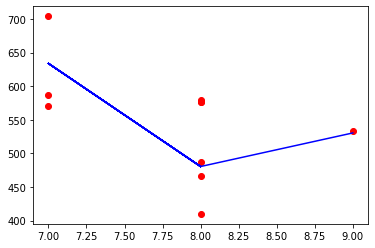

In [ ]:
# scatter plot for original data
#plt.scatter(X_test.carreteras_pavimentadas, y_test, color = 'red')
plt.scatter(X_test, y_test, color = 'red')
 # plot predicted data 
plt.plot(X_test, arbol_regre.predict(X_test), color = 'blue')  
plt.show() 

In [ ]:
#para graficar  Iris-Setosa (0), - Iris-Versicolour (1), - Iris-Virginica (2)
#class_names_list=list(['male', 'female'])
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
dot_data = export_graphviz(arbol_regre,feature_names=['gasolina_impuesto','ingreso_promedio','carreteras_pavimentadas','porcen_licencias_conducion_poblacion'])
graph = graph_from_dot_data(dot_data)
graph.write_png('arbol_gasolina.png')

True

$Arbol de regresión predicción meteorológico

---
Llovera o no llovera
